This project is an end‑to‑end demonstration of how to work with time‑series data in pandas and visualize the results with matplotlib. It begins by importing the core libraries—pandas for data manipulation, numpy for numerical routines, and matplotlib for plotting—and configuring pandas to handle datetime conversions automatically. Next, it reads a CSV file of daily U.S. birth counts from a remote URL, parsing the separate year, month, and day columns into a single datetime column and setting that as the DataFrame’s index. The notebook then inspects the data with methods like .info(), .describe(), and .isna(), drops any rows with missing values, and confirms the types. After cleaning, it enriches the dataset by extracting the year, month, day of month, and day of week into new columns, enabling flexible grouping and analysis. Using these engineered features, the code computes annual totals, monthly totals across all years, average births by weekday, and constructs a pivot table of births by year and month. It also identifies the top 1% of days by birth count to highlight unusually high‑volume days. Finally, the project produces a series of visualizations—line plots, bar charts, and a histogram—to reveal trends over time, seasonal patterns, weekday effects, and the overall distribution of daily births. Throughout, the notebook showcases pandas’ ability to streamline data loading, cleaning, feature creation, aggregation, and plotting in a coherent, reproducible workflow.

In [43]:
import pandas as pd
import numpy as np
from pandas.api import types
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

In [45]:
# URL of the CSV
url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"


df = pd.read_csv(
    url,
    parse_dates={'date': ['year', 'month', 'day']},
    dtype={'births': int},
    na_values=['?'] )


df.set_index('date', inplace=True)


df.head()


<ipython-input-45-a5b94b2cfe6e>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


,gender,births
date,,
1969 1 1,F,4046
1969 1 1,M,4440
1969 1 2,F,4454
1969 1 2,M,4548
1969 1 3,F,4548


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15547 entries, 1969 1 1 to 2008 12 nan
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  15547 non-null  object
 1   births  15547 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 364.4+ KB


In [48]:
df.describe()

,births
count,15547.000000
mean,9762.293561
std,28552.465810
min,1.000000
25%,4358.000000
50%,4814.000000
75%,5289.500000
max,199622.000000


In [49]:
df.isna().sum()

,0
gender,0
births,0


In [50]:
before = len(df)


df = df.dropna(subset=['births'])


after = len(df)
print(f"Dropped {before-after} rows with missing births.")

assert types.is_integer_dtype(df['births'])


Dropped 0 rows with missing births.


In [52]:

print(f"Index type before conversion: {type(df.index)}")
print(f"Sample index values before conversion: {df.index[:5].tolist()}")

if not isinstance(df.index, pd.DatetimeIndex):

    try:

        df.index = pd.to_datetime(df.index, errors='coerce')
    except Exception as e:
        print(f"Error converting index to datetime: {e}")

        raise


df.dropna(axis=0, inplace=True)

df['year']        = df.index.year
df['month']       = df.index.month
df['day_of_week'] = df.index.day_name()
df['day_of_month']= df.index.day


df[['births','year','month','day_of_week']].head()

Index type before conversion: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Sample index values before conversion: [Timestamp('1969-01-01 00:00:00'), Timestamp('1969-01-01 00:00:00'), Timestamp('1969-01-02 00:00:00'), Timestamp('1969-01-02 00:00:00'), Timestamp('1969-01-03 00:00:00')]


,births,year,month,day_of_week
date,,,,
1969-01-01,4046,1969,1,Wednesday
1969-01-01,4440,1969,1,Wednesday
1969-01-02,4454,1969,1,Thursday
1969-01-02,4548,1969,1,Thursday
1969-01-03,4548,1969,1,Friday


In [54]:
df['year']        = df.index.year
df['month']       = df.index.month
df['day_of_week'] = df.index.day_name()
df['day_of_month']= df.index.day

df[['births','year','month','day_of_week']].head()

,births,year,month,day_of_week
date,,,,
1969-01-01,4046,1969,1,Wednesday
1969-01-01,4440,1969,1,Wednesday
1969-01-02,4454,1969,1,Thursday
1969-01-02,4548,1969,1,Thursday
1969-01-03,4548,1969,1,Friday


In [56]:
if not isinstance(df.index, pd.DatetimeIndex):

    try:
        df.index = pd.to_datetime(df.index)
    except Exception as e:
        print(f"Error converting index to datetime: {e}")

        raise

df['year']        = df.index.year
df['month']       = df.index.month
df['day_of_week'] = df.index.day_name()
df['day_of_month']= df.index.day


df[['births','year','month','day_of_week']].head()

,births,year,month,day_of_week
date,,,,
1969-01-01,4046,1969,1,Wednesday
1969-01-01,4440,1969,1,Wednesday
1969-01-02,4454,1969,1,Thursday
1969-01-02,4548,1969,1,Thursday
1969-01-03,4548,1969,1,Friday


In [57]:

births_per_year = df.groupby('year')['births'].sum()

births_per_month = df.groupby('month')['births'].sum()


births_by_dow = df.groupby('day_of_week')['births'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)


print(births_per_year.tail())
print(births_per_month)
print(births_by_dow)


year
1984    3673531
1985    3765054
1986    3760682
1987    3813211
1988    3913786
Name: births, dtype: int64
month
1     5759165
2     5362585
3     5868140
4     5560775
5     5785220
6     5758571
7     6220295
8     6309764
9     6205972
10    6055372
11    5695273
12    5904376
Name: births, dtype: int64
day_of_week
Monday       4972.097315
Tuesday      5183.988015
Wednesday    5044.725096
Thursday     4997.512452
Friday       5073.386015
Saturday     4354.168582
Sunday       4145.248322
Name: births, dtype: float64


In [59]:
# days with exceptionally high births
high_births = df[df['births'] > df['births'].quantile(0.99)]
high_births.sort_values('births', ascending=False).head(10)


,gender,births,year,month,day_of_week,day_of_month
date,,,,,,
1988-07-07,M,6527,1988,7,Thursday,7
1988-09-20,M,6519,1988,9,Tuesday,20
1988-09-23,M,6482,1988,9,Friday,23
1970-09-22,M,6480,1970,9,Tuesday,22
1988-09-09,M,6474,1988,9,Friday,9
1988-09-22,M,6473,1988,9,Thursday,22
1987-09-11,M,6471,1987,9,Friday,11
1988-09-16,M,6469,1988,9,Friday,16
1988-09-15,M,6419,1988,9,Thursday,15


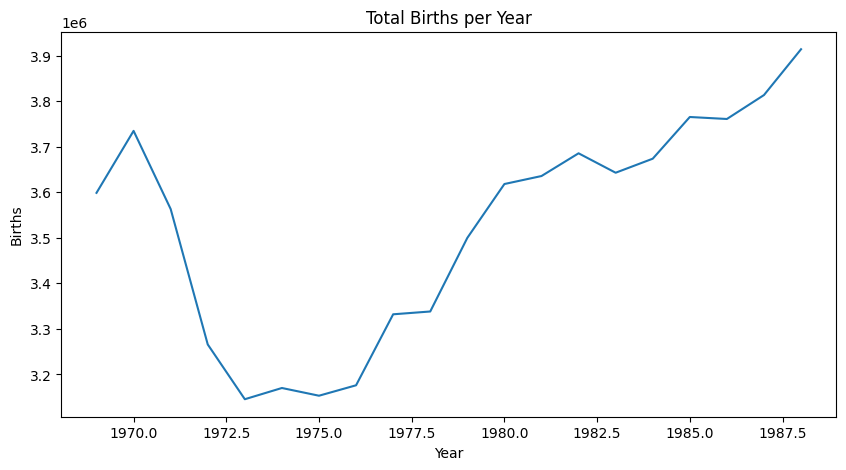

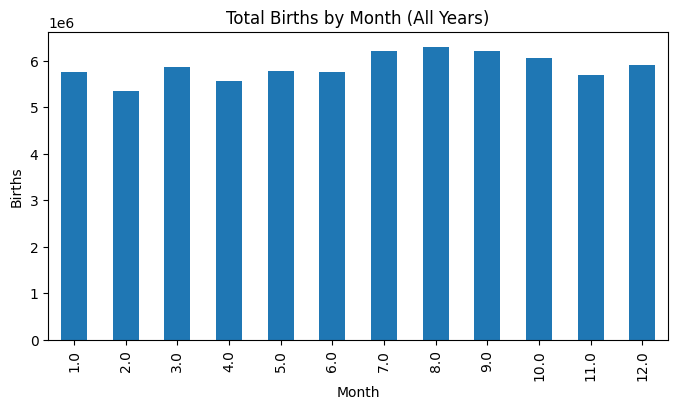

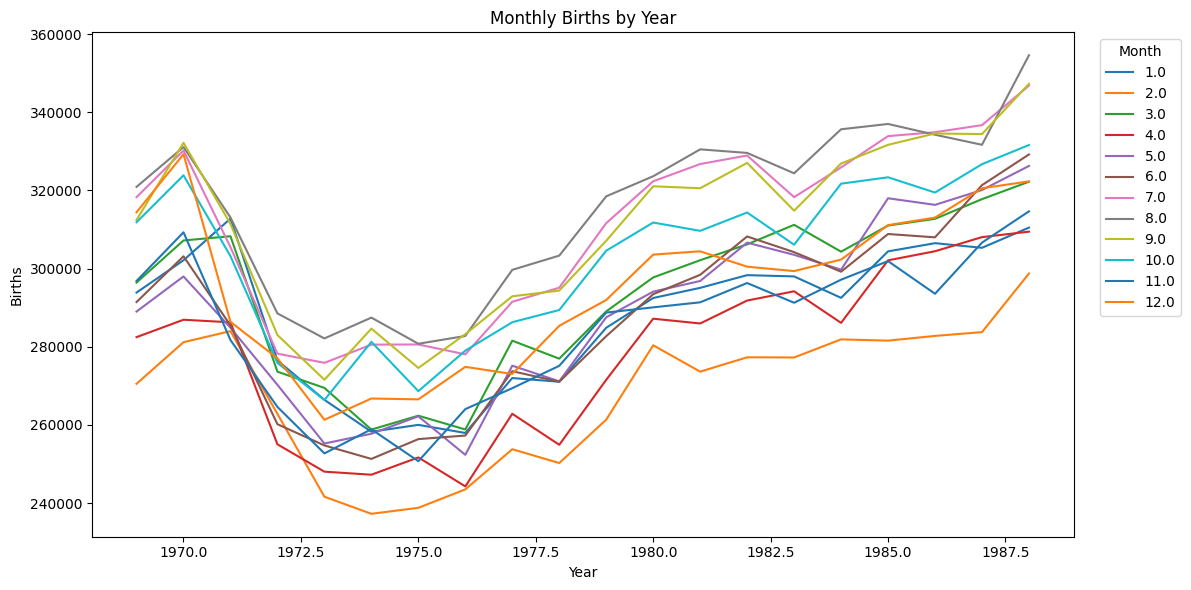

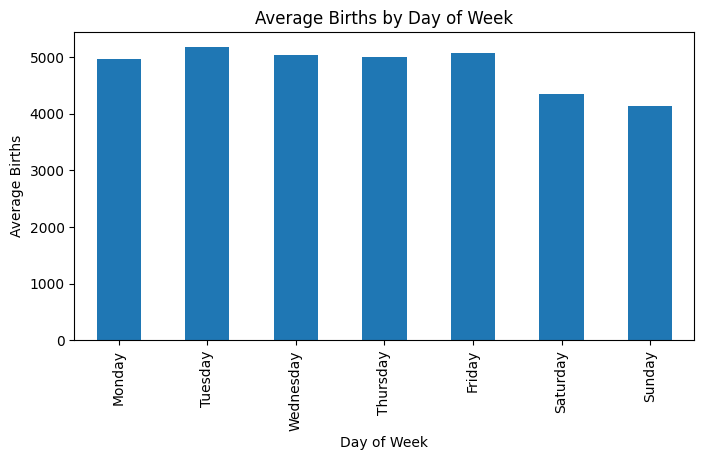

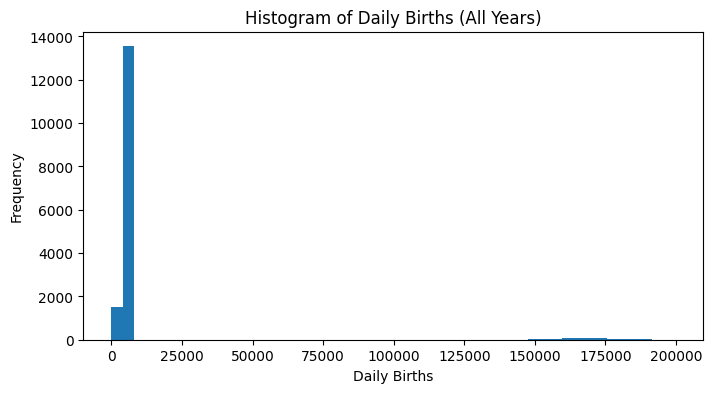

In [42]:
# 1. Line plot: total births per year
ax = births_per_year.plot(
    title="Total Births per Year",
    xlabel="Year",
    ylabel="Births",
    figsize=(10,5)
)
plt.show()

# 2. Bar chart: total births per month
births_per_month.plot(
    kind='bar',
    title="Total Births by Month (All Years)",
    xlabel="Month",
    ylabel="Births",
    figsize=(8,4)
)
plt.show()

# 3. Line plot: monthly births trends by year
pivot.plot(
    figsize=(12,6),
    title="Monthly Births by Year",
    xlabel="Year",
    ylabel="Births"
)
plt.legend(title="Month", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Bar chart: average births by day of week
births_by_dow.plot(
    kind='bar',
    title="Average Births by Day of Week",
    xlabel="Day of Week",
    ylabel="Average Births",
    figsize=(8,4)
)
plt.show()

# 5. Distribution of daily births
df['births'].plot(
    kind='hist',
    bins=50,
    xlabel='Daily Births',
    title='Histogram of Daily Births (All Years)',
    figsize=(8,4)
)
plt.show()
